<a href="https://colab.research.google.com/github/13020363/UTS_ML2019_ID13020363/blob/master/Airbnb_Barca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Airbnb in Barca

Description of dataset

### 1.Load dataset

In [0]:
# Load libraries
import pandas as pd
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import KBinsDiscretizer

In [31]:
col_names = ['room_type', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
# load dataset
file_dir = "https://raw.githubusercontent.com/13020363/UTS_ML2019_ID13020363/master/barca.csv"
pima = pd.read_csv(file_dir, header=None, names=col_names)
pima.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Eixample,27,4.5,10,1,264,41.391617,2.162516
1,Shared room,Sants-Montjuïc,13,4.0,12,1,129,41.373268,2.170138
2,Shared room,Sants-Montjuïc,11,4.0,12,1,129,41.372360,2.169215
3,Shared room,Eixample,9,5.0,2,1,72,41.391836,2.154014
4,Shared room,Eixample,10,5.0,2,1,64,41.387623,2.148761


### 2.Data exploration

The selection of technique for data exploreation is based on the characters of the dataset.After a discussion, this section will explore this dataset to find shomething interesting by using the statistics, the distribution of each feature and the correlation. 

In [0]:
#get the required pacakges
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import plotting
from string import ascii_letters

#### 2.1 Statistics

The statistics consists of mean, median, max and min of reviews, overall_statisfaction, accommodates, bedroom, price, latitude and longitude. The detailed view is indicated in Boxplot section.

In [41]:
#the statistics of each column
statistic_cols = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
for statistic_col in statistic_cols:
  print (statistic_col,':', ' mean:', np.mean(pima[statistic_col]), '  median:', np.median(pima[statistic_col]), '  max:', np.max(pima[statistic_col]), '  min:', np.min(pima[statistic_col]))

reviews :  mean: 36.560753581888704   median: 19.0   max: 457   min: 3
overall_satisfaction :  mean: 4.5602390564394835   median: 4.5   max: 5.0   min: 1.0
accommodates :  mean: 3.3847067204939445   median: 2.0   max: 16   min: 1
bedrooms :  mean: 1.5356605715190375   median: 1.0   max: 10   min: 0
price :  mean: 101.21491332225125   median: 75.0   max: 3606   min: 10
latitude :  mean: 41.392160667854036   median: 41.389284   max: 41.465618   min: 41.351784
longitude :  mean: 2.1677268435842705   median: 2.168013   max: 2.227329   min: 2.088379


The scatter matrix can show the statistics of each feature and the correlation as well. In this section, it is mainly used to show the statistics of some main features: reviews, overall_satisfaction, accommodates and price. The correlation will be shown in section 2.4.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5490b5cc0>,
      dtype=object)

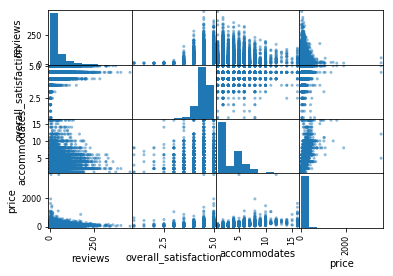

In [43]:
#display statistics of the numerical features
plotting.scatter_matrix(pima[['reviews', 'overall_satisfaction', 'accommodates', 'price']])

#### 2.2 Pie chart

The pie charts in this section are used to show the distributions of the categorial features: room_type and neighborhood. Figure n shows that room_type has 3 values: entire home/apt, private room and shared room, and private room occupies more than half(51.7%), followed by entire home/apt(47.7%). The last part is shared room taking up 0.7%. <br>
The figure n+1 indicates the distribution of neighborhood. The Eixample is the most name taking up 33.9%. The value of the second name Ciutat Vella is 12.3% less than the first one. The following names, Sants-Montjuïc, Sant Marti and Les Gràcia, have the similar percentages around 10%. The left space are separated by Sarrià-Sant Gervasi,Horta-Guinardó, Les Corts, Sant Andreu and Nou Barris

In [0]:
#the funcation of drawing a pie chart
def pie_chart(pname):
  pie_name = pname

  rt_group = pima[pie_name].value_counts()
  
  # Pie chart, where the slices will be ordered and plotted counter-clockwise:
  labels = pima[pie_name].value_counts().index
  sizes = array(rt_group)

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  plt.show()

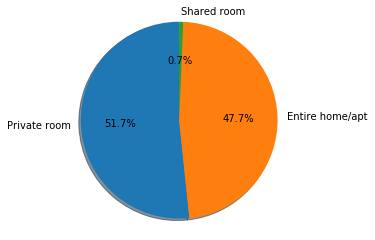

In [54]:
#pie chart of room_type
pie_chart('room_type')

In [0]:
pima['neighborhood'].value_counts()

Eixample               4288
Ciutat Vella           2723
Sants-Montjuïc         1507
Sant Martí             1473
Gràcia                 1191
Sarrià-Sant Gervasi     435
Horta-Guinardó          416
Les Corts               238
Sant Andreu             205
Nou Barris              157
Name: neighborhood, dtype: int64

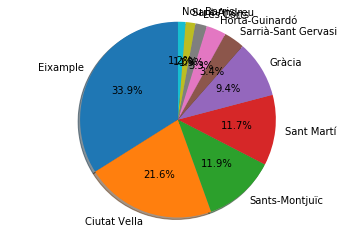

In [56]:
#pie chart of neighborhood
pie_chart('neighborhood')

#### 2.3 Boxplot

In [0]:
#display boxplots of reviews, overall_satisfaction, accommodates, bedrooms, price, latitude and longitude

#names = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
def boxplot_airbnb(pname):
  names = pname
  for boxplot_name in names:
    fig, ax = plt.subplots()
    ax.set_title(boxplot_name)
    ax.boxplot(pima[boxplot_name])

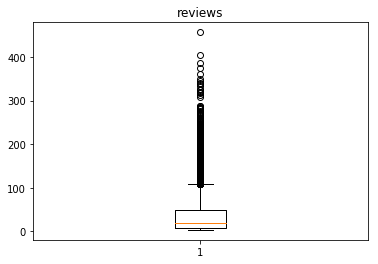

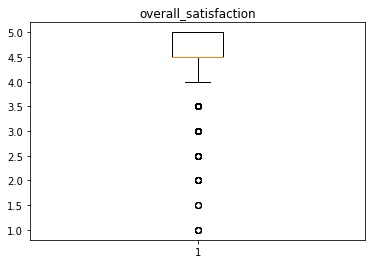

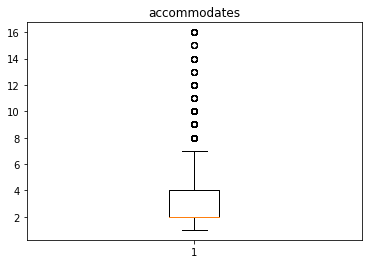

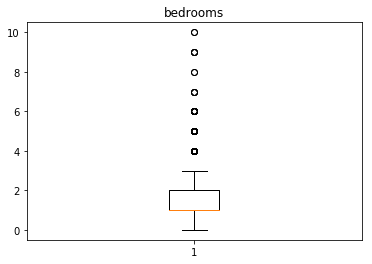

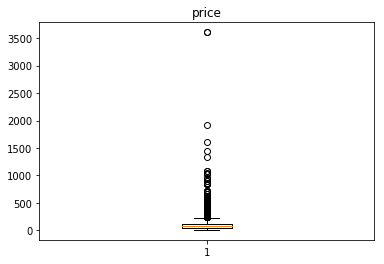

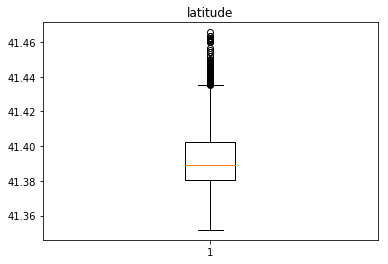

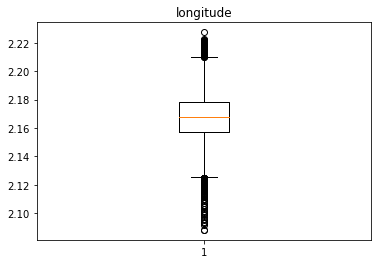

In [80]:
#for a in ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']:
boxplot_airbnb(['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude'])

#### 2.4 Correlation matrix

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


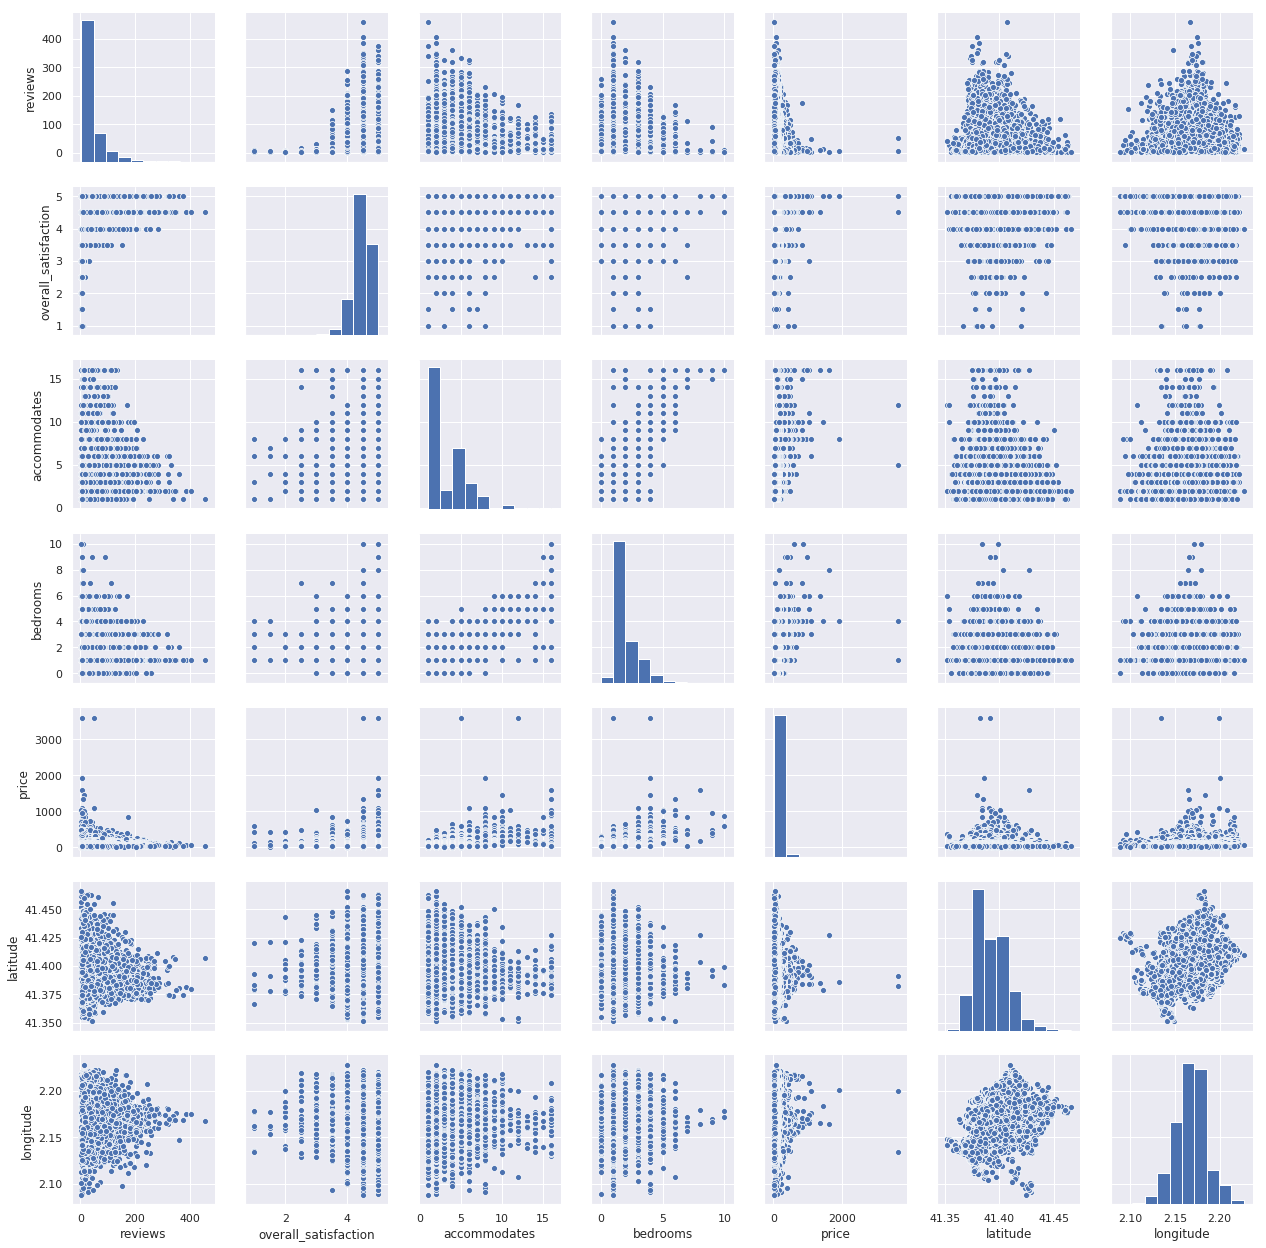

In [144]:
#display statistics of the numerical features using pairplot
sns.set()
names = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
sns.pairplot(pima[names], size=2.5)
plt.show()

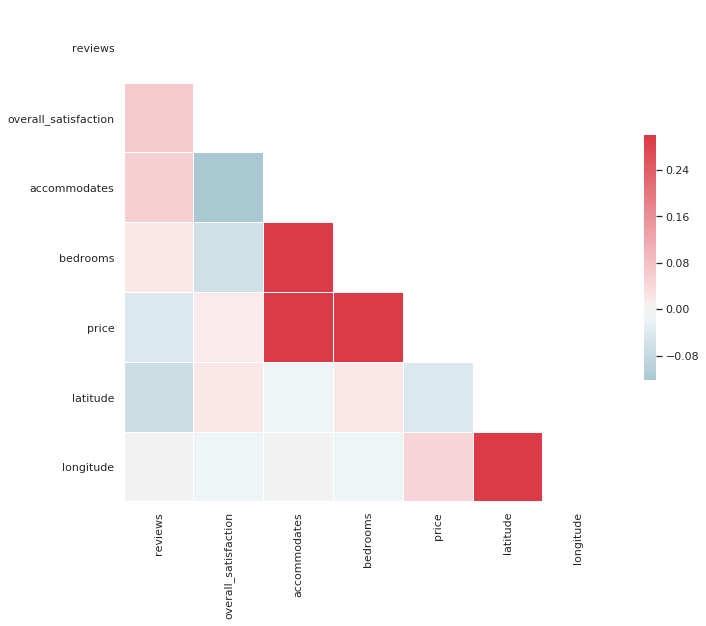

In [156]:
#display correlation matrix
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
col_names_cm = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
d = pima[col_names_cm]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3.Preprocess

Through the previous steps, something interesting are found and the methods of preprocessing can be considered. In this section, three methods are used to preprocess the dataset, so that the classifiers can predict the result more accarately. The first one is changing the type of categorical variables to numeric, because the classifiers used in the study only accept numeric features. The next one divids the data points of price into 3 categories( 0, 1, 2) so it can increase the speed by reducing the number of tree levels. The last one decide the features which will be used in classifiers.

#### 3.1 Convert categorical variable to numeric

There totally are two categorical features, room_type and neighborhood respictively, needing to convert. The way of converting is replacing the distinct values of each feature by integers which start from 1. As is shown in Figure n+2, room_typecategory and neighborhoodcategory replace the old relevant fetures.

In [0]:
#convert the types of room_type and neighborhuud to numeric columns called room_typecategory and neighborhoodcategory
cvTn_names = ['room_type', 'neighborhood']

for cvTn_name in cvTn_names:
  new_name = cvTn_name + 'category'
  pima[cvTn_name] = pima[cvTn_name].astype('category')
  pima[new_name] = pima[cvTn_name].cat.codes

In [0]:
pima.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,room_typecategory,neighborhoodcategory
0,Shared room,Eixample,27,4.5,10,1,264,41.391617,2.162516,2,1
1,Shared room,Sants-Montjuïc,13,4.0,12,1,129,41.373268,2.170138,2,8
2,Shared room,Sants-Montjuïc,11,4.0,12,1,129,41.372360,2.169215,2,8
3,Shared room,Eixample,9,5.0,2,1,72,41.391836,2.154014,2,1
4,Shared room,Eixample,10,5.0,2,1,64,41.387623,2.148761,2,1


#### 3.2 Bin price

The values of price are divided into 3 bins and the bins are called 0, 1 and 2 respectively, based on the same width of each feature.

In [0]:
#discretize the feather Price
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_pandas = pima.price # Target variable
y_np = array(y_pandas)
y_reshape = y_np.reshape(-1, 1)
est.fit(y_reshape)
y = est.transform(y_reshape)

In [70]:
print (y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#### 3.3 Features selection

All the features can be used after reprocessing,thus, no features are filtered. Finally, split dataset into trainning set and test set as X_train, X_test, y_train and y_test.
<br>
Due to the series of preprocessing, the accuracy increases to 0.9998021369212505 from 0.84.

In [0]:
#split dataset in features and target variable and
#select the features
feature_cols = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude', 'room_typecategory', 'neighborhoodcategory']
X = pima[feature_cols] # Features


In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### 4.Classifaction

In this section, 4 classifiers, Decision Tree, Support Vector Machine, Nearest neighborhood and Random Forest, will be compared and optimized to find one which has the best performance. The method has two parts. Firstly, using the default parameters of each classifier first then tuning its performance by adjusting the values of some parameters, at last, scoring its performance. Next, evaluating the performace of each classifier based on the score and select the best one as the final proposal.

#### 4.1 Decision Tree Classifier

Build Decision Tree model and predict using default parameters as a reference standard. The score is 0.9998416970080735.

In [88]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Show the parameters
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [89]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9998021369212505


##### Parameter Optimization for DT

This section mainly test two main parameters: min_samples_split and max_depth, because the key point of optimizing Decision Tree is controlling the size of trees. To reduce the size of trees, both parameters need optimization. The first part is tuning the min_spales_split and its range is between 2 to 50. The second part is tuning the max_depth and its range is between 2 to 50. From the accuracies of both, the performance increases although the original accuracy was very high. The best value of accuracy is 0.9998680564718301.

###### the value of min_samples_split

In [90]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [91]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9998680564718301
{'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


###### the value of max_depth

In [92]:
# Define the parameter values that should be searched
max_depth_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(max_depth=max_depth_range)

# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 1

In [93]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9998680564718301
{'max_depth': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


##### Visualization of Decision Tree

In [0]:
import graphviz
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[4] <= 1234.0\ngini = 0.001\nsamples = 6316\nvalue = [6312, 3, 1]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 6312\nvalue = [6312, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[6] <= 2.15\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

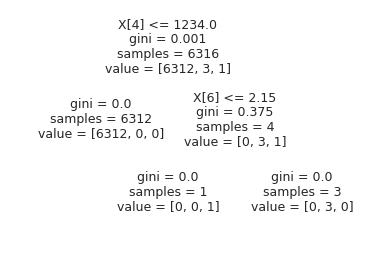

In [183]:
#Use tree to visualize
tree.plot_tree(clf.fit(X_train,y_train))

Through the visualization of Decision Tree, the process of decisionn is very clear.

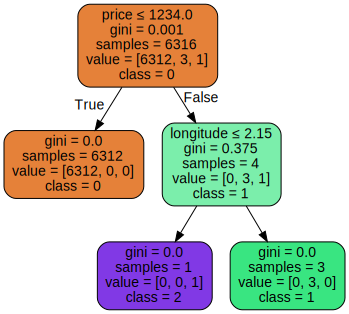

In [184]:
#Use graphviz to visualize
classes = ['0','1','2']
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### 4.2 Support Vector Machine

The accuracy of Support Vector Machine is 0.999604273842501.

In [95]:
from sklearn import svm

#Create SVM object
clf_svm = svm.SVC()

#Train SVM dataset
clf_svm.fit(X_train,y_train)

#Predict SVM dataset
y_pred_svm = clf_svm.predict(X_test)

#Show the parameters
clf_svm.get_params

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.999604273842501


##### Parameter Optimization for SVM

The key point is controlling the C and kernel, because both parameters can affect the performace directly. The process of optimization is calculating the highest accuracy in the range of C ( 0.001, 0.01, 0.1, 1, 10.). The best value of C is 0.001 and the related accuracy is 0.9994722258873202, while the best kernel is linear and the accuracy is 0.9998680564718301. The best accuracy is 9998680564718301.

###### the value of C

In [0]:
# C optimization
# Define the parameter values that should be searched
C_range = [0.001, 0.01, 0.1, 1, 10]

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid_SVM = dict(C=C_range)

# instantiate the grid
grid_svm = GridSearchCV(clf_svm, param_grid_SVM, cv=10, scoring='accuracy')

# fit the grid with data
grid_svm.fit(X_train, y_train)

In [98]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_svm.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_svm.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_svm.best_estimator_)

0.9994722258873202
{'C': 0.001}
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


###### the value of kernel

The method is similar with the optimization of C, but the range of kernel is in linear, rbf and poly. The best value of kernel is linear and the accuracy is 0.9998680564718301. 

In [0]:
# kernel optimization
# Define the parameter values that should be searched
kernel_range = ['linear', 'rbf', 'poly']


# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid_SVM = dict(kernel=kernel_range)

# instantiate the grid
grid_svm = GridSearchCV(clf_svm, param_grid_SVM, cv=10, scoring='accuracy')

# fit the grid with data
grid_svm.fit(X_train, y_train)

In [100]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_svm.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_svm.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_svm.best_estimator_)

0.9998680564718301
{'kernel': 'linear'}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [0]:
def svc_param_selection(X, y):
  #nfolds = 3
  Cs = [0.001, 0.01, 0.1, 1, 10]
  gammas = [0.001, 0.01, 0.1, 1]
  param_grid = {'C': Cs, 'gamma' : gammas}
  
  grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
  grid_search.fit(X, y)
  best_parameters = grid_search.best_params_
  
  print (best_parameters)

In [195]:
svc_param_selection(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

{'C': 0.001, 'gamma': 0.001}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4.3 Nearest Neighbors Classifier

In [199]:
#Nerest neighbors
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier()
clf_nn.fit(X_train, y_train)
y_pred_nn = clf_nn.predict(X_test)
clf_nn.get_params

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [200]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nn))

Accuracy: 0.9996833940161469


##### Parameter Optimization for NN

###### the value of n_neighbor

The key parameter which affects the performance of Nerest Neighbors Classifier is n_neighbors. The range is defined in 1, 2, 3, 4 and 5. After the optimization, the best value is 1 and the accuracy is 0.9998416719442685.

In [0]:
# C optimization
# Define the parameter values that should be searched
n_neighbors_range = [1, 2, 3, 4, 5]

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid_NN = dict(n_neighbors=n_neighbors_range)

# instantiate the grid
grid_nn = GridSearchCV(clf_nn, param_grid_NN, cv=10, scoring='accuracy')

# fit the grid with data
grid_nn.fit(X_train, y_train)

In [213]:
# examine the best model

# Single best score achieved across all params 
print(grid_nn.best_score_)

# Dictionary containing the parameters used to generate that score
print(grid_nn.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_nn.best_estimator_)

0.9998416719442685
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


#### 4.4 Random Forest Classifier

In [9]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
clf_rf.get_params

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9998416970080735


##### Parameter Optimization for RF

###### the value of n_estimators 

According to the websit Scikit Learn, the main parameters are n_estimaters and max_features. The parameter n_estimaters represents the number of trees in the forest. The higher value of this parameter takes more samples, but it will spend more time.
Another one max_features means the size of the subset of features. One should be careful when tuning this parameter. Because the higher value can increase the bias, while the lower value can decline the variance. Thus, it recommands that the empirical default value is None for regression or sqtr for classification, meaning considering all the features instead of random subsets. Except for the two parameters, one parameter to consider is max_depth. It is usually None along with min_samples_split=2. After the optimization, the best value of n_estimaters is 40 and the best accuracy is 0.9996833438885371.

In [0]:
# n_estimators optimization
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
n_estimators_range = [10, 20, 30, 40]

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid_RF = dict(n_estimators=n_estimators_range)

# instantiate the grid
grid_rf = GridSearchCV(clf_rf, param_grid_RF, cv=10, scoring='accuracy')

# fit the grid with data
grid_rf.fit(X_train, y_train)

In [27]:
# examine the best model

# Single best score achieved across all params 
print(grid_rf.best_score_)

# Dictionary containing the parameters used to generate that score
print(grid_rf.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_rf.best_estimator_)

0.9996833438885371
{'n_estimators': 40}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Evaluation

At last, the accuracies of the classifiers are listed in Table n. In the table, the highest value is 0.9998680564718301 resulting from Decision Tree and Support Vector Machine. The accuracies of Nearest Neighborhood and Random Forest are 0.9998416719442685 and 0.9996833438885371 respectively, ranking the second and the third. The simplist way is comparing the values of the accuraies of each classifier, thus, the better proposals are Decision Tree and Support Vector Machine. Compared with Decision Tree, Support Vector Machine is not good at processing a huge amount of dataset, so the best classifier may be Decision Tree. Except for the accuracies, however, the characteristic of each classifier should be considered more, because the charactors can be suitable to different datasets. Next part analyses the characteristics of the classifiers. The process of Decision Tree is based on a lot of decisions, yes or no, and then it goes one direction after answer the question and forms a branch. This way is the closest to human's way of thingking. Support Vecter Machine maps the data in the lower dimensional space to the higher dimensional space and separate them by using the hyperplane. The method of Nearest Neighbors is that a point selects some points nearest to it and confirms its value based on the value which most points are. Simply,Random Forest is a way consisting of many Decision Trees and result the final model based on the Decision Trees. On one hand, in contrast, the ways of both Desicion Tree and Support Vector Machine are reasonable and accurate, while Nearest Neighbors may be affected by probability. On the other hand, however, the Decision Tree and Support Vector Machine consume more system resources or spend more time. In summary, for this dataset, the best way is Decision Tree or Support Vector Machine.